# start

In [1]:
# !pip install gensim
# !pip install catboost
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 91.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is inco

In [ ]:
!pip install --upgrade ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cd7957930dee2b639a42b3d9c7cd3efcf9dae03a7afbd7bea5e2f7ef3c9db239
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [1]:
import pandas as pd
# from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import f1_score, mean_absolute_percentage_error, r2_score, mean_squared_error

In [2]:
def two_label(work_var, lab_var, df):
    df[lab_var] = ''

    for i in range(len(df)):
        if df.loc[i, work_var] <= df[work_var].quantile(0.5):
            df.loc[i, lab_var] = 0
        else:
            df.loc[i, lab_var] = 1

    print(f'Минимум - {min(df[work_var])}')
    print(f'Медиана - {df[work_var].quantile(0.5)}')
    print(f'Максимум - {max(df[work_var])}')

In [3]:
model_df = pd.read_excel('final_df.xlsx', index_col=0)

In [4]:
model_df = model_df[model_df['mean_price'] >= 600].reset_index(drop = True)
model_df

,url_psy,name,rating,count_reviews,very_positive,passport,video,all_info,qualification,count_photo,...,self_presentation,experience,adult,family,child_teen,neuropsy,mean_price,text_for_work,dominant_topic,markup
0,ShiryaevaOV4,Ольга Вадимовна Ширяева,4.88,184,0,Паспорт проверен,0,Работает дистанционно\nО себе\nЗдравствуйте! М...,Может консультировать только взрослых,2,...,"\nЗдравствуйте! Меня зовут Ольга, я — магистр ...",\nЧастнос 2016 г. (8 лет)\nДистанционное психо...,1,0,0,0,6375.000000,здравствовать звать ольга магистр психология к...,0,0.421293
1,RybachenkoSS,Сергей Сергеевич Рыбаченко,4.93,296,1,Паспорт проверен,0,Работает дистанционно\nО себе\nВеду прием онла...,Может консультировать только взрослых,0,...,"\nВеду прием онлайн по WhatsApp, Zoom, Skype, ...",\n,1,0,0,0,3560.000000,вести прием онлайн whatsapp zoom skype telegra...,0,-0.216349
2,ChudopalovaEM,Елена Маликовна Чудопалова,4.76,99,0,Паспорт проверен,0,Работает дистанционно\nО себе\nПрактикующий пс...,"Может консультировать взрослых, детей и подрос...",3,...,"\nПрактикующий психолог, коуч\nЯ являюсь экспе...",\nДействительный член Профессиональной психоте...,1,0,1,0,4976.190476,практиковать психолог коуч являться эксперт ме...,0,-0.589658
3,MotoraMN,Майя Николаевна Мотора,4.98,151,1,Паспорт проверен,1,Работает дистанционно\nСпециалист из Красноярс...,"Может консультировать взрослых, семьи и пары",11,...,"\nПсихолог медицинского центра, специалист сем...",\nПсихолог ГУ МВД России по Красноярскому краю...,1,1,0,0,4443.478261,психолог медицинский центр специалист семейный...,2,-0.321475
4,MstislavskayaAA,Анна Алексеевна Мстиславская,4.70,87,0,Паспорт проверен,0,Работает дистанционно\nО себе\nЯ профессиональ...,"Может консультировать взрослых, семьи и пары",9,...,\nЯ профессиональный психолог и сексолог с опы...,\nЧастная психологическая практикас 2010 г. (1...,1,1,0,0,4181.818182,профессиональный психолог сексолог опыт работа...,3,0.633243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,ZaharovaOA,Оксана Александровна Дежкина,0.00,0,0,Паспорт проверен,0,Принимает у себя\nЗападный\nРаботает дистанцио...,Может консультировать только взрослых,5,...,\n20 лет работаю с клиентами в кризисных жизне...,\nПсихологс 2005 г. (19 лет)\nРепетиторская де...,1,0,0,0,2600.000000,20 год работать клиент кризисный жизненный сит...,2,0.544374
1892,VerchenovaYA,Екатерина Андреевна Верченова,0.00,0,0,Паспорт проверен,0,Принимает у себя\nУлица 1905 года\nРаботает ди...,Может консультировать только взрослых,1,...,"\nЯ практикующий психолог, психотерапевт, секс...",\n,1,0,0,0,7416.666667,практиковать психолог психотерапевт сексолог 1...,0,0.111664
1893,LebedevaYA56,Екатерина Андреевна Лебедева,0.00,0,0,Паспорт проверен,0,Работает дистанционно\nО себе\nЗдравствуйте! М...,Может консультировать только взрослых,0,...,"\nЗдравствуйте! Меня зовут Лебедева Екатерина,...",\n,1,0,0,0,4750.000000,здравствовать звать лебедев екатерина 39 год 7...,2,-1.317644
1894,LashmanovaEV,Евгения Валентиновна Асланова,5.00,10,0,Паспорт проверен,0,Принимает у себя\nВДНХ\nРаботает дистанционно\...,Может консультировать только взрослых,0,...,\nЯ — психоаналитически-ориентированный психол...,\nРепетиторская деятельностьс 2007 г. (17 лет)\n,1,0,0,0,2400.000000,психоаналитическиориентированный психолог спец...,2,-0.844129


In [5]:
import re
model_df['answers'] = ''
for i in range(len(model_df)):
    model_df.loc[i, 'answers'] = len(re.findall(r'Ответ специалиста', model_df.loc[i, 'reviews']))

In [6]:
model_df['len_presentation'] = ''
for i in range(len(model_df)):
    model_df.loc[i, 'len_presentation'] = int(len(model_df['self_presentation'][i].replace('\n', ' ')))

# two_label('mean_price', 'label_price', model_df)
# model_df['label_price'] = model_df['label_price'].astype(int)

In [7]:
model_df.to_excel('final_data.xlsx')

In [ ]:
# перекодирование кноминальных переменных
model_df = pd.get_dummies(model_df, columns=['dominant_topic'])

le = LabelEncoder()
# F-0, M-1
model_df['sex'] = le.fit_transform(model_df['sex'])

# Паспорт не проверен-0, Паспорт проверен-1
model_df['passport'] = le.fit_transform(model_df['passport'])

 ## проверка мультиколлинеарности

In [ ]:
features = ['rating', 'count_reviews', 'answers', 'very_positive', 'passport', 'video', 'count_photo', \
            'docs', 'sex', 'online', 'offline', 'weight_rating', 'count_edu', 'adult', 'family', \
            'child_teen', 'neuropsy', 'markup', 'len_presentation',  'dominant_topic_0', 'dominant_topic_1', \
            'dominant_topic_2']

In [ ]:
y = model_df['label_price']
x = model_df[features]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

In [ ]:
multi = model_df[features]

In [ ]:
!pip install randan
from randan.bivariate_association import Correlation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for randan: filename=randan-1.3.35-py3-none-any.whl size=111697 sha256=714cec9b02c3b11d09c373903bfa5cccc1eae8eb9ad3e16304c376b952e183d7
  Stored in directory: /root/.cache/pip/wheels/c9/90/9a/779520d359a89b6bf356e1c2931caf0d26a9b35a7031e42dd1
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=b8b5a985317d30f5461b71d2eb4d11e6cb2b4739ea525b69cedef20a6a6ce433
  Stored in directory: /root/.cache/pip/wheels/5e/90/99/807a5ad861ce5d22c3c299a1

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(multi)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=features)

In [ ]:
corr = Correlation(x_train_scaled_df[['answers', 'count_reviews']], method = 'spearman')


CORRELATION SUMMARY (SPEARMAN METHOD, 2-TAILED)
------------------


Note: Each empty index duplicates the previous one.
Maximum correlation is 0.615 (p-value 0.0) for variables answers and count_reviews,
minimum correlation is 0.615 (p-value 0.0) for variables answers and count_reviews.


In [ ]:
corr = Correlation(x_train_scaled_df, method = 'spearman')


CORRELATION SUMMARY (SPEARMAN METHOD, 2-TAILED)
------------------


Note: Each empty index duplicates the previous one.
Maximum correlation is 0.559 (p-value 0.0) for variables very_positive and label_count_reviews,
minimum correlation is -0.348 (p-value 0.0) for variables dominant_topic_0 and dominant_topic_3.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["Признак"] = x_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_scaled_df.values, i) for i in range(x_train_scaled_df.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))

             Признак          VIF
11     weight_rating  2947.770049
1      count_reviews  2936.390885
21  dominant_topic_2     2.652661
19  dominant_topic_0     2.179092
12         count_edu     1.923639
7               docs     1.895341
3      very_positive     1.602964
20  dominant_topic_1     1.511582
17            markup     1.430143
2            answers     1.347385
18  len_presentation     1.225976
15        child_teen     1.222598
14            family     1.211699
0             rating     1.156656
6        count_photo     1.093166
8                sex     1.053125
13             adult     1.048753
10           offline     1.038313
5              video     1.033424
16          neuropsy     1.025271
9             online     1.020437
4           passport     1.015748


## логистическая регрессия

In [ ]:
features = ['rating', 'count_reviews','answers', 'very_positive', 'passport', 'video', 'count_photo', \
            'docs', 'sex', 'online', 'offline', 'count_edu', 'adult', 'family', \
            'child_teen', 'neuropsy', 'markup', 'len_presentation',  'dominant_topic_1', \
            'dominant_topic_2', 'dominant_topic_3']

In [ ]:
y = model_df['label_price']
x = model_df[features]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='lbfgs', max_iter=7000, penalty = 'l2', random_state=100)
logr.fit(x_train, y_train)

# Оценка модели
y_pred = logr.predict(x_test)
f1_score(y_test, logr.predict(x_test),average='weighted')

0.7107189557745295

In [ ]:
# Получаем коэффициенты и имена признаков
coefficients = logr.coef_[0]
feature_names = x_train.columns

# Создаем DataFrame для наглядности
import pandas as pd
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортируем по абсолютной величине коэффициента
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print(coef_df)

             Feature  Coefficient  Abs_Coefficient
10           offline     1.037934         1.037934
12             adult     1.036143         1.036143
15          neuropsy     0.909451         0.909451
3      very_positive     0.747027         0.747027
13            family     0.670212         0.670212
9             online    -0.456387         0.456387
4           passport    -0.428328         0.428328
20  dominant_topic_3     0.266779         0.266779
18  dominant_topic_1    -0.252141         0.252141
5              video     0.237275         0.237275
16            markup     0.065700         0.065700
8                sex     0.064192         0.064192
11         count_edu     0.042965         0.042965
6        count_photo     0.022781         0.022781
14        child_teen    -0.022232         0.022232
7               docs    -0.015264         0.015264
0             rating     0.011329         0.011329
1      count_reviews     0.006069         0.006069
19  dominant_topic_2    -0.0058

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=features)
x_train_scaled_df['label_price'] = y_train.values

In [ ]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=features)

In [ ]:
formula = 'label_price ~ ' + ' + '.join(features)

# Логистическая регрессия (Logit)
model = smf.logit(formula, data=x_train_scaled_df)
result = model.fit_regularized(L1_wt=0.5, method='l1', maxiter=1000)

# Выводим статистику
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6097609708250509
            Iterations: 59
            Function evaluations: 60
            Gradient evaluations: 59
                           Logit Regression Results                           
Dep. Variable:            label_price   No. Observations:                 1517
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                           21
Date:                Tue, 06 May 2025   Pseudo R-squ.:                  0.1202
Time:                        10:55:23   Log-Likelihood:                -925.01
converged:                       True   LL-Null:                       -1051.4
Covariance Type:            nonrobust   LLR p-value:                 1.148e-41
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
y_pred_proba = result.predict(x_test_scaled_df)
y_pred = (y_pred_proba > 0.5).astype(int)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.702786270340321


# пробуем выбрать только факторы с самопрезентацией

In [ ]:
features = ['very_positive', 'passport', 'video', 'count_photo', \
            'docs', 'sex', 'online', 'offline', 'count_edu', 'adult', 'family', \
            'child_teen', 'neuropsy', 'markup', 'len_presentation',  'dominant_topic_1', \
            'dominant_topic_2', 'dominant_topic_3']

In [ ]:
y = model_df['label_price']
x = model_df[features]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=features)
x_train_scaled_df['label_price'] = y_train.values

In [ ]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=features)

In [ ]:
formula = 'label_price ~ ' + ' + '.join(features)

# Логистическая регрессия (Logit)
model = smf.logit(formula, data=x_train_scaled_df)
result = model.fit_regularized(L1_wt=0.5, method='l1', maxiter=1000)

# Выводим статистику
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6120010366952542
            Iterations: 53
            Function evaluations: 54
            Gradient evaluations: 53
                           Logit Regression Results                           
Dep. Variable:            label_price   No. Observations:                 1517
Model:                          Logit   Df Residuals:                     1498
Method:                           MLE   Df Model:                           18
Date:                Tue, 15 Apr 2025   Pseudo R-squ.:                  0.1170
Time:                        12:05:13   Log-Likelihood:                -928.41
converged:                       True   LL-Null:                       -1051.4
Covariance Type:            nonrobust   LLR p-value:                 5.404e-42
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
y_pred_proba = result.predict(x_test_scaled_df)
y_pred = (y_pred_proba > 0.5).astype(int)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.7028191982963004


# модельки

## лог. рег. для цены

In [ ]:
y_var = 'label_price'
var_indf = 'mean_price'

two_label(var_indf, y_var, model_df)
model_df[y_var] = model_df[y_var].astype(int)

Минимум - 666.6666666666666
Медиана - 3389.7569444444443
Максимум - 27673.07692307692


In [ ]:
features = ['sex', 'online', 'offline', 'passport', \
            'video', 'count_photo', 'dominant_topic_0', 'dominant_topic_2', 'dominant_topic_3', 'markup', 'answers', 'len_presentation', \
            'count_edu', 'docs', 'adult', 'family', 'child_teen', 'neuropsy', \
            'rating', 'count_reviews', 'very_positive']

# features = ['sex', 'online', 'offline', 'passport', \
#             'video', 'count_photo', 'dominant_topic_3', 'dominant_topic_2', 'dominant_topic_0', 'markup', 'answers', 'len_presentation', \
#             'count_edu', 'docs', 'adult', 'family', 'child_teen', 'neuropsy', \
#             'rating', 'count_reviews', 'very_positive']

# features = ['sex', 'online', 'offline', 'passport', \
#             'video', 'count_photo', 'dominant_topic_1', 'dominant_topic_2', 'dominant_topic_3', 'markup', 'answers', 'len_presentation', \
#             'count_edu', 'docs', 'adult', 'family', 'child_teen', 'neuropsy']

In [ ]:
y = model_df[y_var]
x = model_df[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=features)
x_train_scaled_df[y_var] = y_train.values

x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=features)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем vif для каждого признака
vif_data = pd.DataFrame()
vif_data["Признак"] = x_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_scaled_df.values, i) for i in range(x_train_scaled_df.shape[1])]
for i in range(len(vif_data)):
    if vif_data.loc[i, 'VIF'] < 5:
        vif_data.loc[i, 'Характеристика мультиколлинеарности'] = 'Нет мультиколлинеарности'
    else:
        vif_data.loc[i, 'Характеристика мультиколлинеарности'] = 'Есть мультиколлинеарность'
vif_data = vif_data.sort_values("VIF", ascending=False)
vif_data

,Признак,VIF,Характеристика мультиколлинеарности
7,dominant_topic_2,3.214340,Нет мультиколлинеарности
6,dominant_topic_0,2.983180,Нет мультиколлинеарности
8,dominant_topic_3,2.299428,Нет мультиколлинеарности
12,count_edu,1.925154,Нет мультиколлинеарности
13,docs,1.907055,Нет мультиколлинеарности
19,count_reviews,1.666946,Нет мультиколлинеарности
9,markup,1.450352,Нет мультиколлинеарности
20,very_positive,1.395038,Нет мультиколлинеарности
10,answers,1.353325,Нет мультиколлинеарности
16,child_teen,1.219292,Нет мультиколлинеарности


In [ ]:
formula = 'label_price ~ ' + ' + '.join(features)

# Логистическая регрессия (Logit)
model = smf.logit(formula, data=x_train_scaled_df)
result = model.fit_regularized(L1_wt=0.5, method='l1', maxiter=1000)

# Выводим статистику
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6041013492478076
            Iterations: 63
            Function evaluations: 64
            Gradient evaluations: 63
                           Logit Regression Results                           
Dep. Variable:            label_price   No. Observations:                 1516
Model:                          Logit   Df Residuals:                     1494
Method:                           MLE   Df Model:                           21
Date:                Sun, 11 May 2025   Pseudo R-squ.:                  0.1282
Time:                        16:50:15   Log-Likelihood:                -915.82
converged:                       True   LL-Null:                       -1050.5
Covariance Type:            nonrobust   LLR p-value:                 5.106e-45
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
y_pred_proba = result.predict(x_test_scaled_df)
y_pred = (y_pred_proba > 0.5).astype(int)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.6792688139304764


## для образованных, большое кол-во пройденных учебных курсов

In [ ]:
y_var = 'label_count_edu'
var_indf = 'count_edu'

two_label(var_indf, y_var, model_df)
model_df[y_var] = model_df[y_var].astype(int)

Минимум - 0
Медиана - 7.0
Максимум - 63


In [ ]:
# features = ['sex', 'online', 'offline', 'passport', \
#             'mean_price', \
#             'video', 'count_photo', 'dominant_topic_0', 'dominant_topic_2', 'dominant_topic_3', 'markup', 'answers', 'len_presentation', \
#             'docs', 'adult', 'family', 'child_teen', 'neuropsy']

features = ['sex', 'online', 'offline', 'passport', \
            'mean_price', \
            'video', 'count_photo', 'dominant_topic_0', 'dominant_topic_2', 'dominant_topic_3', 'markup', 'answers', 'len_presentation', \
            'docs', 'adult', 'family', 'child_teen', 'neuropsy', \
            'rating', 'count_reviews', 'very_positive']

In [ ]:
y = model_df[y_var]
x = model_df[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=features)
x_train_scaled_df[y_var] = y_train.values

x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=features)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем vif для каждого признака
vif_data = pd.DataFrame()
vif_data["Признак"] = x_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_scaled_df.values, i) for i in range(x_train_scaled_df.shape[1])]
for i in range(len(vif_data)):
    if vif_data.loc[i, 'VIF'] < 5:
        vif_data.loc[i, 'Характеристика мультиколлинеарности'] = 'Нет мультиколлинеарности'
    else:
        vif_data.loc[i, 'Характеристика мультиколлинеарности'] = 'Есть мультиколлинеарность'
vif_data = vif_data.sort_values("VIF", ascending=False)
vif_data

,Признак,VIF,Характеристика мультиколлинеарности
8,dominant_topic_2,3.207567,Нет мультиколлинеарности
7,dominant_topic_0,2.977252,Нет мультиколлинеарности
9,dominant_topic_3,2.306456,Нет мультиколлинеарности
19,count_reviews,1.667158,Нет мультиколлинеарности
10,markup,1.445120,Нет мультиколлинеарности
20,very_positive,1.386929,Нет мультиколлинеарности
11,answers,1.354600,Нет мультиколлинеарности
13,docs,1.249591,Нет мультиколлинеарности
16,child_teen,1.212968,Нет мультиколлинеарности
15,family,1.212030,Нет мультиколлинеарности


In [ ]:
formula = y_var + ' ~ ' + ' + '.join(features)

# Логистическая регрессия (Logit)
model = smf.logit(formula, data=x_train_scaled_df)
result = model.fit_regularized(L1_wt=0.5, method='l1', maxiter=1000)

# Выводим статистику
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5068640844900849
            Iterations: 65
            Function evaluations: 66
            Gradient evaluations: 65
                           Logit Regression Results                           
Dep. Variable:        label_count_edu   No. Observations:                 1516
Model:                          Logit   Df Residuals:                     1494
Method:                           MLE   Df Model:                           21
Date:                Sun, 11 May 2025   Pseudo R-squ.:                  0.2687
Time:                        16:51:12   Log-Likelihood:                -768.41
converged:                       True   LL-Null:                       -1050.8
Covariance Type:            nonrobust   LLR p-value:                4.137e-106
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
y_pred_proba = result.predict(x_test_scaled_df)
y_pred = (y_pred_proba > 0.5).astype(int)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.7551765470257028


In [ ]:
import pandas as pd

data = {
    "Переменная": [
        "Intercept", "sex", "online", "offline", "passport", "mean_price", "video",
        "count_photo", "dominant_topic_0", "dominant_topic_2", "dominant_topic_3",
        "markup", "answers", "len_presentation", "docs", "adult", "family",
        "child_teen", "neuropsy", "rating", "count_reviews", "very_positive"
    ],
    "coef": [
        0.2767, -0.1733, -0.4274, -0.0463, 0.0368, 0.2932, -0.0416,
        -0.0202, -0.1976, -0.1559, -0.1124, 0.1498, 0.0521, 0.1168,
        1.8578, 0.0061, -0.0172, 0.1110, -0.0168, 0.0264, 0.1968, 0.0388
    ],
    "std err": [
        1.694, 0.066, 65.884, 0.065, 0.076, 0.076, 0.076,
        0.071, 0.108, 0.112, 0.096, 0.075, 0.077, 0.072,
        0.113, 0.070, 0.069, 0.070, 0.069, 0.068, 0.084, 0.075
    ],
    "z": [
        0.163, -2.635, -0.006, -0.715, 0.483, 3.854, -0.546,
        -0.285, -1.824, -1.390, -1.176, 1.987, 0.676, 1.633,
        16.510, 0.087, -0.248, 1.575, -0.244, 0.389, 2.351, 0.515
    ],
    "P>|z|": [
        0.870, 0.008, 0.995, 0.475, 0.629, 0.000, 0.585,
        0.776, 0.068, 0.165, 0.240, 0.047, 0.499, 0.102,
        0.000, 0.931, 0.804, 0.115, 0.807, 0.697, 0.019, 0.607
    ],
    "[0.025": [
        -3.044, -0.302, -129.559, -0.173, -0.112, 0.144, -0.191,
        -0.160, -0.410, -0.376, -0.300, 0.002, -0.099, -0.023,
        1.637, -0.131, -0.153, -0.027, -0.152, -0.106, 0.033, -0.109
    ],
    "0.975]": [
        3.597, -0.044, 128.704, 0.081, 0.186, 0.442, 0.108,
        0.119, 0.015, 0.064, 0.075, 0.298, 0.203, 0.257,
        2.078, 0.143, 0.119, 0.249, 0.118, 0.159, 0.361, 0.187
    ]
}

df = pd.DataFrame(data)
df.set_index("Переменная", inplace=True)
df

,coef,std err,z,P>|z|,[0.025,0.975]
Переменная,,,,,,
Intercept,0.2767,1.694,0.163,0.870,-3.044,3.597
sex,-0.1733,0.066,-2.635,0.008,-0.302,-0.044
online,-0.4274,65.884,-0.006,0.995,-129.559,128.704
offline,-0.0463,0.065,-0.715,0.475,-0.173,0.081
passport,0.0368,0.076,0.483,0.629,-0.112,0.186
mean_price,0.2932,0.076,3.854,0.000,0.144,0.442
video,-0.0416,0.076,-0.546,0.585,-0.191,0.108
count_photo,-0.0202,0.071,-0.285,0.776,-0.160,0.119
dominant_topic_0,-0.1976,0.108,-1.824,0.068,-0.410,0.015


## кол-во комментариев

In [ ]:
y_var = 'label_count_reviews'
var_indf = 'count_reviews'

two_label(var_indf, y_var, model_df)
model_df[y_var] = model_df[y_var].astype(int)

Минимум - 0
Медиана - 7.0
Максимум - 533


In [ ]:
features = ['sex', 'online', 'offline', 'passport', \
            'mean_price', \
            'video', 'count_photo', 'dominant_topic_0', 'dominant_topic_1', 'dominant_topic_3', 'answers', 'markup','len_presentation', \
            'count_edu', 'docs', 'adult', 'family', 'child_teen', 'neuropsy', \
            'very_positive', 'rating']

In [ ]:
y = model_df[y_var]
x = model_df[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=features)
x_train_scaled_df[y_var] = y_train.values

x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=features)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем vif для каждого признака
vif_data = pd.DataFrame()
vif_data["Признак"] = x_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_scaled_df.values, i) for i in range(x_train_scaled_df.shape[1])]
for i in range(len(vif_data)):
    if vif_data.loc[i, 'VIF'] < 5:
        vif_data.loc[i, 'Характеристика мультиколлинеарности'] = 'Нет мультиколлинеарности'
    else:
        vif_data.loc[i, 'Характеристика мультиколлинеарности'] = 'Есть мультиколлинеарность'
vif_data = vif_data.sort_values("VIF", ascending=False)
vif_data

,Признак,VIF,Характеристика мультиколлинеарности
13,count_edu,1.951689,Нет мультиколлинеарности
14,docs,1.891209,Нет мультиколлинеарности
9,dominant_topic_3,1.702020,Нет мультиколлинеарности
7,dominant_topic_0,1.520665,Нет мультиколлинеарности
11,markup,1.449735,Нет мультиколлинеарности
8,dominant_topic_1,1.336265,Нет мультиколлинеарности
19,very_positive,1.330651,Нет мультиколлинеарности
21,label_count_reviews,1.323002,Нет мультиколлинеарности
10,answers,1.218099,Нет мультиколлинеарности
12,len_presentation,1.216831,Нет мультиколлинеарности


In [ ]:
formula = y_var + ' ~ ' + ' + '.join(features)

# Логистическая регрессия (Logit)
model = smf.logit(formula, data=x_train_scaled_df)
result = model.fit_regularized(L1_wt=0.5, method='l1', maxiter=1000)

# Выводим статистику
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29913382138456
            Iterations: 117
            Function evaluations: 117
            Gradient evaluations: 117
                            Logit Regression Results                           
Dep. Variable:     label_count_reviews   No. Observations:                 1516
Model:                           Logit   Df Residuals:                     1494
Method:                            MLE   Df Model:                           21
Date:                 Tue, 13 May 2025   Pseudo R-squ.:                  0.5684
Time:                         19:45:35   Log-Likelihood:                -453.49
converged:                        True   LL-Null:                       -1050.7
Covariance Type:             nonrobust   LLR p-value:                9.071e-240
                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
y_pred_proba = result.predict(x_test_scaled_df)
y_pred = (y_pred_proba > 0.5).astype(int)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.8387294685407138


In [ ]:
import pandas as pd

data = {
    "Переменная": [
        "Intercept", "sex", "online", "offline", "passport", "mean_price", "video",
        "count_photo", "dominant_topic_0", "dominant_topic_1", "dominant_topic_3",
        "answers", "markup", "len_presentation", "count_edu", "docs", "adult",
        "family", "child_teen", "neuropsy", "very_positive", "rating"
    ],
    "coef": [
        5.1535, 0.2179, -0.1215, 0.1200, 1.0259, 0.1288, 0.0553,
        0.0476, -0.0293, -0.0153, 0.0657, 4.4503, 0.0430, 0.1739,
        0.1016, -0.2101, -0.1618, 0.1916, 0.2967, 0.1599, 9.0430, 1.4858
    ],
    "std err": [
        544.259, 0.088, 5952.657, 0.084, 815.170, 0.099, 0.085,
        0.085, 0.101, 0.098, 0.109, 0.424, 0.098, 0.101,
        0.130, 0.123, 0.079, 0.090, 0.090, 0.079, 941.707, 0.259
    ],
    "z": [
        0.009, 2.473, -2.04e-05, 1.420, 0.001, 1.298, 0.649,
        0.562, -0.291, -0.156, 0.601, 10.497, 0.437, 1.720,
        0.779, -1.706, -2.045, 2.123, 3.314, 2.024, 0.010, 5.730
    ],
    "P>|z|": [
        0.992, 0.013, 1.000, 0.156, 0.999, 0.194, 0.516,
        0.574, 0.771, 0.876, 0.548, 0.000, 0.662, 0.085,
        0.436, 0.088, 0.041, 0.034, 0.001, 0.043, 0.992, 0.000
    ],
    "[0.025": [
        -1061.575, 0.045, -1.17e+04, -0.046, -1596.678, -0.066, -0.112,
        -0.118, -0.227, -0.208, -0.148, 3.619, -0.150, -0.024,
        -0.154, -0.451, -0.317, 0.015, 0.121, 0.005, -1836.668, 0.978
    ],
    "0.975]": [
        1071.882, 0.391, 1.17e+04, 0.286, 1598.730, 0.323, 0.222,
        0.214, 0.168, 0.178, 0.280, 5.281, 0.236, 0.372,
        0.357, 0.031, -0.007, 0.368, 0.472, 0.315, 1854.754, 1.994
    ]
}

df = pd.DataFrame(data)
df.set_index("Переменная", inplace=True)
df

,coef,std err,z,P>|z|,[0.025,0.975]
Переменная,,,,,,
Intercept,5.1535,544.259,0.00900,0.992,-1061.575,1071.882
sex,0.2179,0.088,2.47300,0.013,0.045,0.391
online,-0.1215,5952.657,-0.00002,1.000,-11700.000,11700.000
offline,0.1200,0.084,1.42000,0.156,-0.046,0.286
passport,1.0259,815.170,0.00100,0.999,-1596.678,1598.730
mean_price,0.1288,0.099,1.29800,0.194,-0.066,0.323
video,0.0553,0.085,0.64900,0.516,-0.112,0.222
count_photo,0.0476,0.085,0.56200,0.574,-0.118,0.214
dominant_topic_0,-0.0293,0.101,-0.29100,0.771,-0.227,0.168


## рейтинг

In [ ]:
y_var = 'label_rating'
var_indf = 'rating'

# two_label(var_indf, y_var, model_df)
# model_df[y_var] = model_df[y_var].astype(int)

In [ ]:
def two_label_pers(work_var, lab_var, df, var_num):
    df[lab_var] = ''

    for i in range(len(df)):
        if df.loc[i, work_var] <= var_num:
            df.loc[i, lab_var] = 0
        else:
            df.loc[i, lab_var] = 1

In [ ]:
two_label_pers(var_indf, y_var, model_df, 4.7)
model_df[y_var] = model_df[y_var].astype(int)

In [ ]:
model_df[y_var].value_counts()

,count
label_rating,
1,1427
0,469


In [ ]:
features = ['sex', 'online', 'offline', 'passport', \
            'mean_price', \
            'video', 'count_photo', 'dominant_topic_1', 'dominant_topic_2', 'dominant_topic_3', 'answers', 'markup','len_presentation', \
            'count_edu', 'docs', 'adult', 'family', 'child_teen', 'neuropsy', \
            'very_positive','count_reviews']

In [ ]:
y = model_df[y_var]
x = model_df[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=features)
x_train_scaled_df[y_var] = y_train.values

x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=features)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисляем vif для каждого признака
vif_data = pd.DataFrame()
vif_data["Признак"] = x_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_scaled_df.values, i) for i in range(x_train_scaled_df.shape[1])]
for i in range(len(vif_data)):
    if vif_data.loc[i, 'VIF'] < 5:
        vif_data.loc[i, 'Характеристика мультиколлинеарности'] = 'Нет мультиколлинеарности'
    else:
        vif_data.loc[i, 'Характеристика мультиколлинеарности'] = 'Есть мультиколлинеарность'
vif_data = vif_data.sort_values("VIF", ascending=False)
vif_data

,Признак,VIF,Характеристика мультиколлинеарности
13,count_edu,1.966735,Нет мультиколлинеарности
14,docs,1.905100,Нет мультиколлинеарности
20,count_reviews,1.663785,Нет мультиколлинеарности
8,dominant_topic_2,1.469652,Нет мультиколлинеарности
11,markup,1.451591,Нет мультиколлинеарности
19,very_positive,1.371305,Нет мультиколлинеарности
9,dominant_topic_3,1.364299,Нет мультиколлинеарности
10,answers,1.347737,Нет мультиколлинеарности
17,child_teen,1.218858,Нет мультиколлинеарности
12,len_presentation,1.214214,Нет мультиколлинеарности


In [ ]:
formula = y_var + ' ~ ' + ' + '.join(features)

# Логистическая регрессия (Logit)
model = smf.logit(formula, data=x_train_scaled_df)
result = model.fit_regularized(L1_wt=0.5, method='l1', maxiter=1000)

# Выводим статистику
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4561469387598513
            Iterations: 84
            Function evaluations: 85
            Gradient evaluations: 84
                           Logit Regression Results                           
Dep. Variable:           label_rating   No. Observations:                 1516
Model:                          Logit   Df Residuals:                     1494
Method:                           MLE   Df Model:                           21
Date:                Tue, 13 May 2025   Pseudo R-squ.:                  0.1867
Time:                        20:10:30   Log-Likelihood:                -691.52
converged:                       True   LL-Null:                       -850.30
Covariance Type:            nonrobust   LLR p-value:                 8.390e-55
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
y_pred_proba = result.predict(x_test_scaled_df)
y_pred = (y_pred_proba > 0.5).astype(int)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.7642330482344424


In [ ]:
import pandas as pd

data = {
    "Переменная": [
        "Intercept", "sex", "online", "offline", "passport", "mean_price", "video",
        "count_photo", "dominant_topic_1", "dominant_topic_2", "dominant_topic_3",
        "answers", "markup", "len_presentation", "count_edu", "docs", "adult",
        "family", "child_teen", "neuropsy", "very_positive", "count_reviews"
    ],
    "coef": [
        5.9904, -0.1354, -0.2765, 0.0382, 0.1179, -0.1420, 0.0191,
        0.2066, 0.1000, -0.0433, -0.0215, -0.0869, -0.0743, 0.0158,
        -0.1435, 0.2940, -0.0138, 0.0448, 0.0579, 0.0712, 8.7609, 1.1639
    ],
    "std err": [
        8260.309, 0.069, 3.2e+05, 0.068, 0.065, 0.067, 0.099,
        0.088, 0.075, 0.078, 0.076, 0.202, 0.079, 0.082,
        0.104, 0.100, 0.068, 0.078, 0.082, 0.081, 1471.740, 0.302
    ],
    "z": [
        0.001, -1.957, -8.64e-07, 0.558, 1.804, -2.111, 0.194,
        2.354, 1.326, -0.554, -0.281, -0.430, -0.943, 0.193,
        -1.376, 2.938, -0.204, 0.573, 0.709, 0.881, 0.006, 3.857
    ],
    "P>|z|": [
        0.999, 0.050, 1.000, 0.577, 0.071, 0.035, 0.847,
        0.019, 0.185, 0.580, 0.778, 0.667, 0.346, 0.847,
        0.169, 0.003, 0.838, 0.567, 0.478, 0.378, 0.995, 0.000
    ],
    "[0.025": [
        -1.62e+04, -0.271, -6.27e+05, -0.096, -0.010, -0.274, -0.175,
        0.035, -0.048, -0.196, -0.171, -0.483, -0.229, -0.145,
        -0.348, 0.098, -0.146, -0.108, -0.102, -0.087, -2875.797, 0.572
    ],
    "0.975]": [
        1.62e+04, 0.000, 6.27e+05, 0.172, 0.246, -0.010, 0.213,
        0.379, 0.248, 0.110, 0.128, 0.309, 0.080, 0.176,
        0.061, 0.490, 0.119, 0.198, 0.218, 0.229, 2893.319, 1.755
    ]
}

df = pd.DataFrame(data)
df.set_index("Переменная", inplace=True)
df

,coef,std err,z,P>|z|,[0.025,0.975]
Переменная,,,,,,
Intercept,5.9904,8260.309,1.000000e-03,0.999,-16200.000,16200.000
sex,-0.1354,0.069,-1.957000e+00,0.050,-0.271,0.000
online,-0.2765,320000.000,-8.640000e-07,1.000,-627000.000,627000.000
offline,0.0382,0.068,5.580000e-01,0.577,-0.096,0.172
passport,0.1179,0.065,1.804000e+00,0.071,-0.010,0.246
mean_price,-0.1420,0.067,-2.111000e+00,0.035,-0.274,-0.010
video,0.0191,0.099,1.940000e-01,0.847,-0.175,0.213
count_photo,0.2066,0.088,2.354000e+00,0.019,0.035,0.379
dominant_topic_1,0.1000,0.075,1.326000e+00,0.185,-0.048,0.248


# Кластеризация - попытка

In [ ]:
features = ['sex', 'online', 'offline', 'passport', \
            'mean_price', \
            'video', 'count_photo','dominant_topic_0', 'dominant_topic_1', 'dominant_topic_2', 'dominant_topic_3', 'markup', 'answers', 'len_presentation', \
            'count_edu', 'docs', 'adult', 'family', 'child_teen', 'neuropsy', \
            'rating', 'count_reviews', 'very_positive']

In [ ]:
cluster_df = model_df[features]
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)
cluster_scaled_df = pd.DataFrame(cluster_scaled, columns=features)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance as sci_distance
from sklearn import cluster as sk_cluster

## уменьшение размерности

<ipython-input-10-5d1c40e78fed>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_scaled[:, 0], cluster_scaled[:, 1], cmap='rainbow_r', s=5, alpha=0.7)


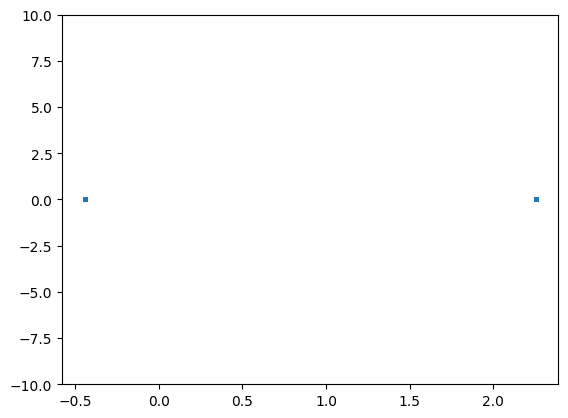

In [ ]:
plt.scatter(cluster_scaled[:, 0], cluster_scaled[:, 1], cmap='rainbow_r', s=5, alpha=0.7)
plt.ylim(-10, 10)
plt.show()

[0.12291609 0.0924084 ]


<ipython-input-68-64001cb68c37>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)


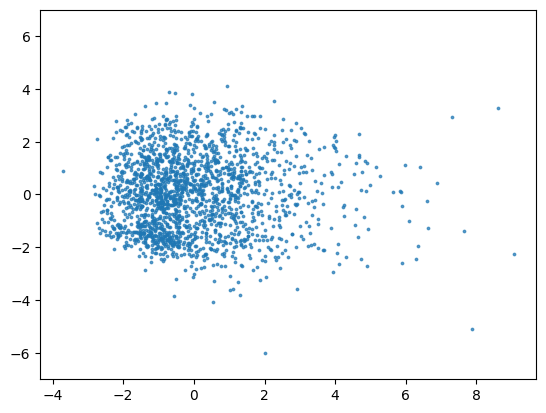

In [ ]:
# PCA -метод главных компонент
from sklearn.decomposition import PCA

pca = PCA(n_components=2,
        #   svd_solver='auto'
          )
X_reduced = pca.fit_transform(cluster_scaled_df)

print(pca.explained_variance_ratio_)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)
plt.ylim(-7, 7)
plt.show()

0.7354945540428162


<ipython-input-10-fc90bc4035e8>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)


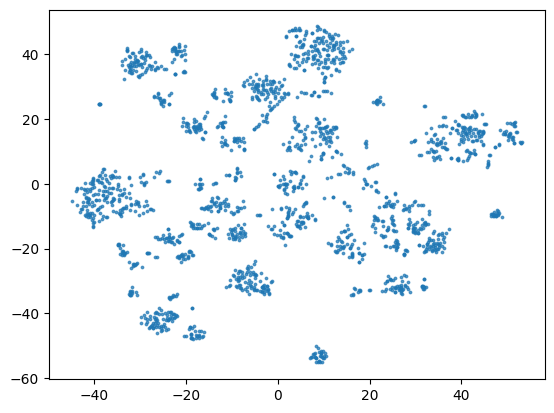

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2, # number of components
    # init="pca",     # initial state for training the algorithm
    random_state=6, # pseudorandom number generator state
    # perplexity=15., # number of neighbors. recommended from 5 to 50
)

X_reduced = tsne.fit_transform(cluster_scaled_df)
# Kulbak-Leibler distance, to estimate quality
print(tsne.kl_divergence_)

plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)
plt.show()

0.8136410117149353


<ipython-input-38-b4b3c7749c52>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)


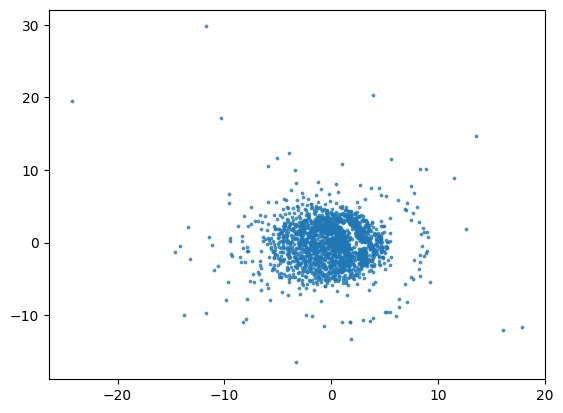

In [ ]:
from sklearn.manifold import MDS

mds2D = MDS(n_components=2)

X_reduced = mds2D.fit_transform(cluster_scaled_df)
# Kulbak-Leibler distance, to estimate quality
print(tsne.kl_divergence_)

plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)
plt.show()

0.7351226806640625


<ipython-input-142-d9b962f3de36>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)


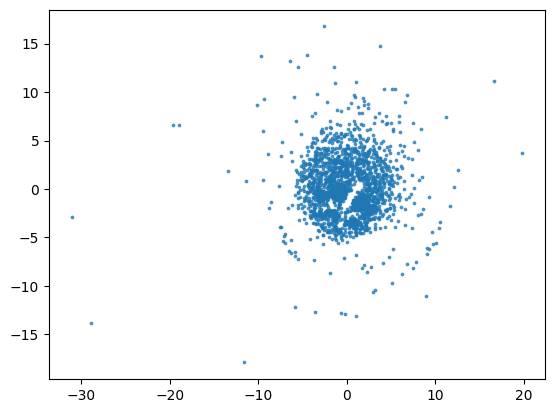

In [ ]:
from sklearn.decomposition import FastICA

ica = MDS(n_components=2)

X_reduced = ica.fit_transform(cluster_scaled_df)
# Kulbak-Leibler distance, to estimate quality
print(tsne.kl_divergence_)

plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)
plt.show()

0.7351226806640625


<ipython-input-143-be1ead3d6fbd>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)


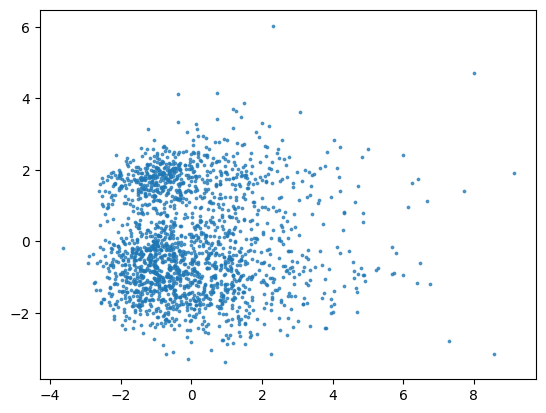

In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd2D = TruncatedSVD(n_components=2)

X_reduced = tsvd2D.fit_transform(cluster_scaled_df)
# Kulbak-Leibler distance, to estimate quality
print(tsne.kl_divergence_)

plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.7351226806640625


<ipython-input-149-4d2060dea279>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)


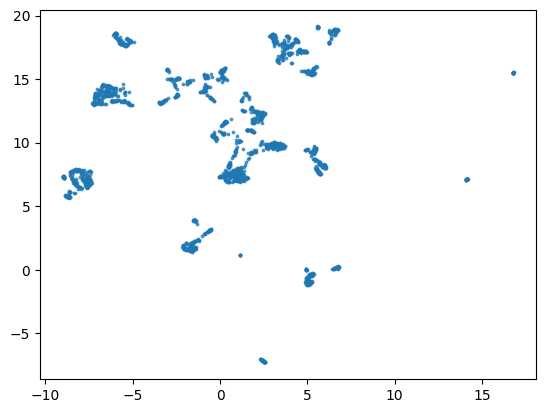

In [ ]:
!pip install umap-learn
from umap.umap_ import UMAP

umap2D = UMAP(n_components=2)

X_reduced = umap2D.fit_transform(cluster_scaled_df)
# Kulbak-Leibler distance, to estimate quality
print(tsne.kl_divergence_)

plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)
plt.show()

## кластеризация

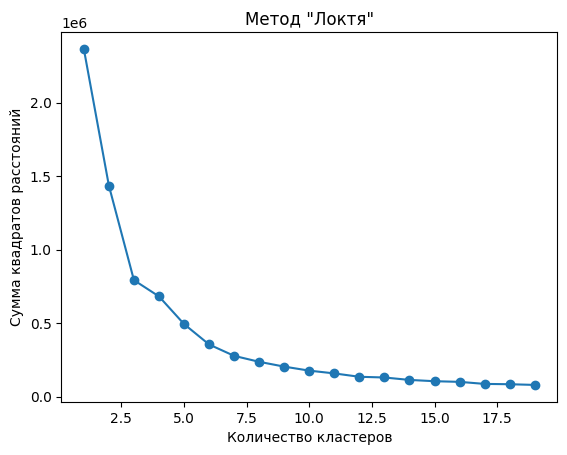

In [ ]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 20), sse, marker='o')
plt.title('Метод "Локтя"')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

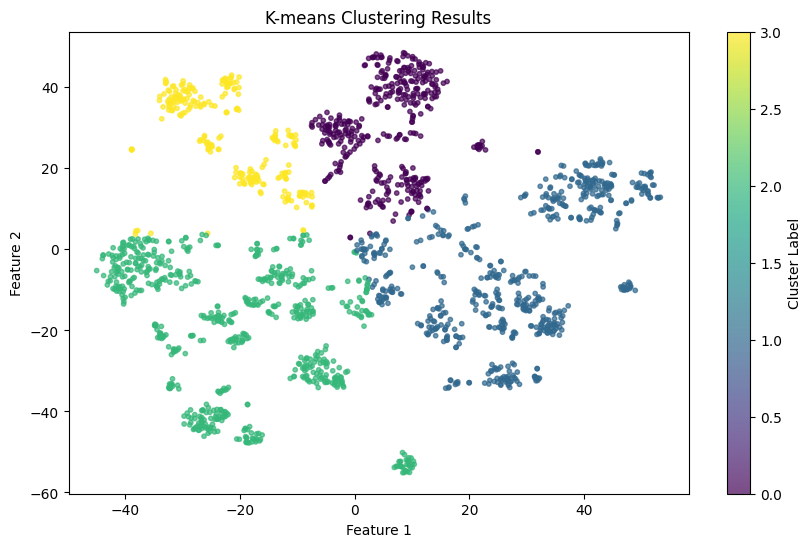

In [ ]:
from sklearn.cluster import KMeans

# Применяем K-means с 5 кластерами (можно изменить количество кластеров)
kmeans = KMeans(n_clusters=4, random_state=40)
kmeans.fit(X_reduced)

# Получаем метки кластеров
labels = kmeans.labels_

# Визуализируем результат кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

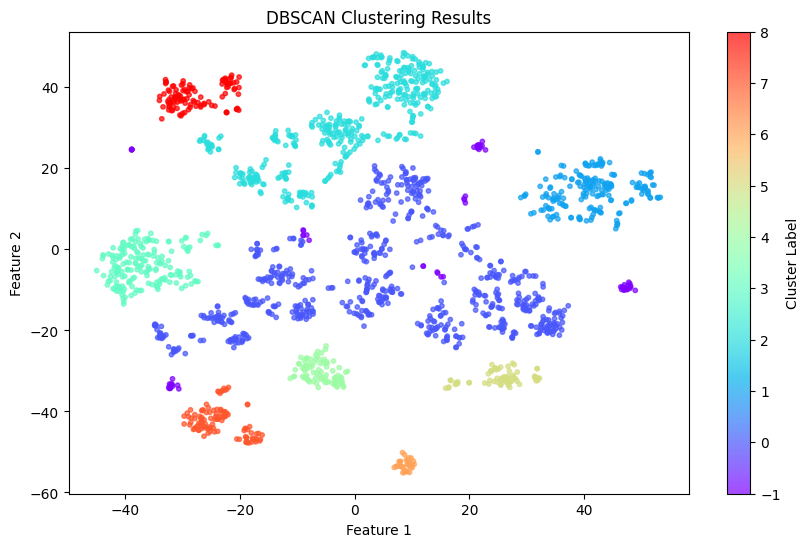

Уникальные метки кластеров: [-1  0  1  2  3  4  5  6  7  8]
Количество шумовых точек (метка -1): 64


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(
    # maximum distance between 2 points,
    # to consider them neighbors (the most important parameter in the algorithm)
    eps=5.55,
    min_samples=20,     # number of examples to consider as basic
    # metric='euclidean'  # point distance metric
)
db.fit(X_reduced)
# get markup for all examples
# all noise examples are labeled -1
labels = db.labels_

# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='rainbow_r', s=3, alpha=0.7)
# plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='rainbow', s=10, alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

import numpy as np
unique_labels = np.unique(labels)
print(f"Уникальные метки кластеров: {unique_labels}")
print(f"Количество шумовых точек (метка -1): {np.sum(labels == -1)}")

In [ ]:
cluster_df['cluster'] = labels  # Добавляем метки кластеров в DataFrame

for cluster_num in np.unique(labels):
    print(f"\nCluster {cluster_num} (n={np.sum(labels == cluster_num)}):")
    print('-' * 40)
    print(cluster_df[labels == cluster_num].mean())
    # print(cluster_df[labels == cluster_num].describe())


Cluster -1 (n=64):
----------------------------------------
sex                   0.421875
online                     1.0
offline               0.390625
passport              0.921875
mean_price          3909.67808
video                 0.203125
count_photo           3.890625
dominant_topic_0      0.359375
dominant_topic_1      0.078125
dominant_topic_2        0.3125
dominant_topic_3          0.25
markup                -0.12958
answers                 7.0625
len_presentation     1971.8125
count_edu              14.5625
docs                    12.125
adult                 0.953125
family                0.265625
child_teen             0.09375
neuropsy              0.296875
rating                3.521406
count_reviews         57.71875
very_positive         0.296875
cluster                   -1.0
dtype: object

Cluster 0 (n=669):
----------------------------------------
sex                    0.167414
online                      1.0
offline                 0.38565
passport                

<ipython-input-40-2e835ad121ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster'] = labels  # Добавляем метки кластеров в DataFrame


In [ ]:
cluster_summary = pd.DataFrame()

cluster_df['cluster'] = labels

# Для каждого кластера рассчитываем средние значения признаков
for cluster_num in np.unique(labels):
    cluster_mean = cluster_df[cluster_df['cluster'] == cluster_num].mean()  # Средние значения для кластера
    cluster_mean['cluster'] = cluster_num  # Добавляем номер кластера в результат
    cluster_summary = pd.concat([cluster_summary, cluster_mean.to_frame().T], ignore_index=True)


In [ ]:
cluster_summary

,sex,online,offline,passport,mean_price,video,count_photo,dominant_topic_0,dominant_topic_1,dominant_topic_2,...,count_edu,docs,adult,family,child_teen,neuropsy,rating,count_reviews,very_positive,cluster
0,0.421875,1.0,0.390625,0.921875,3909.67808,0.203125,3.890625,0.359375,0.078125,0.3125,...,14.5625,12.125,0.953125,0.265625,0.09375,0.296875,3.521406,57.71875,0.296875,-1
1,0.167414,1.0,0.38565,1.0,3967.64137,0.0,2.06577,0.430493,0.007474,0.207773,...,9.7713,6.635277,1.0,0.402093,0.261584,0.0,4.859342,35.849028,0.502242,0
2,0.181347,0.989637,0.26943,1.0,3426.342071,0.0,2.11399,0.0,0.994819,0.005181,...,10.373057,7.860104,1.0,0.119171,0.072539,0.0,4.039948,15.803109,0.264249,1
3,0.285714,1.0,0.34949,1.0,3429.769066,0.0,2.635204,0.0,0.0,1.0,...,7.951531,6.109694,1.0,0.091837,0.002551,0.0,4.6625,13.186224,0.094388,2
4,0.032258,1.0,0.016129,1.0,3021.697896,0.0,2.811828,0.994624,0.0,0.0,...,8.801075,7.225806,1.0,0.005376,0.010753,0.0,4.78543,9.225806,0.010753,3
5,0.0,1.0,1.0,1.0,3464.022437,0.0,1.071429,1.0,0.0,0.0,...,7.988095,5.988095,1.0,0.0,0.0,0.0,4.897738,13.72619,0.0,4
6,0.215385,1.0,0.292308,1.0,5923.94375,0.0,1.415385,0.076923,0.0,0.015385,...,8.446154,5.169231,1.0,0.076923,0.0,0.0,0.611231,2.938462,0.030769,5
7,0.1875,1.0,0.375,1.0,2861.477758,0.0,3.5,0.34375,0.0,0.1875,...,6.46875,4.40625,0.0,0.0,0.34375,0.0,3.72875,14.25,0.21875,6
8,0.0,1.0,0.262136,1.0,3106.316527,0.0,0.757282,1.0,0.0,0.0,...,6.76699,4.330097,1.0,0.087379,0.019417,0.0,0.009709,0.009709,0.0,7
9,0.0,1.0,0.277778,1.0,3084.435416,0.0,1.212963,0.0,0.0,1.0,...,7.416667,5.518519,1.0,0.074074,0.009259,0.0,0.0,0.0,0.0,8


In [ ]:
features.append('cluster')

In [ ]:
scaler = StandardScaler()
cluster_summary_scaled = scaler.fit_transform(cluster_summary)
cluster_summary_scaled_df = pd.DataFrame(cluster_summary_scaled, columns=features)
cluster_summary_scaled_df

,sex,online,offline,passport,mean_price,video,count_photo,dominant_topic_0,dominant_topic_1,dominant_topic_2,...,count_edu,docs,adult,family,child_teen,neuropsy,rating,count_reviews,very_positive,cluster
0,2.029074,0.333333,0.121700,-3.000000,0.344462,3.000000,1.738428,-0.150089,-0.100901,0.104826,...,2.563427,2.598093,0.193505,1.260995,0.106621,3.000000,0.209076,2.443164,0.949112,-1.566699
1,0.135889,0.333333,0.100657,0.333333,0.413276,-0.333333,-0.081455,0.024491,-0.339189,-0.171938,...,0.411687,0.045781,0.350401,2.382967,1.550943,-0.333333,0.891677,1.154048,2.206050,-1.218544
2,0.239551,-3.000000,-0.390960,0.333333,-0.229356,-0.333333,-0.033367,-1.032275,2.990865,-0.707328,...,0.681938,0.615234,0.350401,0.056920,-0.075915,-0.333333,0.473631,-0.027564,0.749425,-0.870388
3,1.016041,0.333333,-0.052304,0.333333,-0.225288,-0.333333,0.486428,-1.032275,-0.364396,1.921689,...,-0.405576,-0.198576,0.350401,-0.167810,-0.678204,-0.333333,0.791250,-0.181817,-0.290200,-0.522233
4,-0.869669,0.333333,-1.462437,0.333333,-0.709751,-0.333333,0.662570,1.409307,-0.364396,-0.721021,...,-0.024043,0.320333,0.350401,-0.878646,-0.607624,-0.333333,0.853968,-0.415265,-0.802083,-0.174078
5,-1.109668,0.333333,2.699388,0.333333,-0.184622,-0.333333,-1.073087,1.422504,-0.364396,-0.721021,...,-0.389155,-0.255110,0.350401,-0.922847,-0.700158,-0.333333,0.911266,-0.149988,-0.867894,0.174078
6,0.492789,0.333333,-0.294187,0.333333,2.735803,-0.333333,-0.730068,-0.843446,-0.364396,-0.680364,...,-0.183440,-0.635821,0.350401,-0.290423,-0.700158,-0.333333,-1.275665,-0.785874,-0.679573,0.522233
7,0.285328,0.333333,0.055606,0.333333,-0.899965,-0.333333,1.348867,-0.188445,-0.364396,-0.225513,...,-1.071497,-0.990550,-2.996716,-0.922847,2.258029,-0.333333,0.314861,-0.119112,0.470952,0.870388
8,-1.109668,0.333333,-0.421815,0.333333,-0.609291,-0.333333,-1.386378,1.422504,-0.364396,-0.721021,...,-0.937556,-1.025956,0.350401,-0.204462,-0.533058,-0.333333,-1.582556,-0.958510,-0.867894,1.218544
9,-1.109668,0.333333,-0.355649,0.333333,-0.635269,-0.333333,-0.931938,-1.032275,-0.364396,1.921689,...,-0.645785,-0.473428,0.350401,-0.313846,-0.620476,-0.333333,-1.587509,-0.959082,-0.867894,1.566699


In [ ]:
cluster_summary_scaled_df.to_excel('claster_df.xlsx')

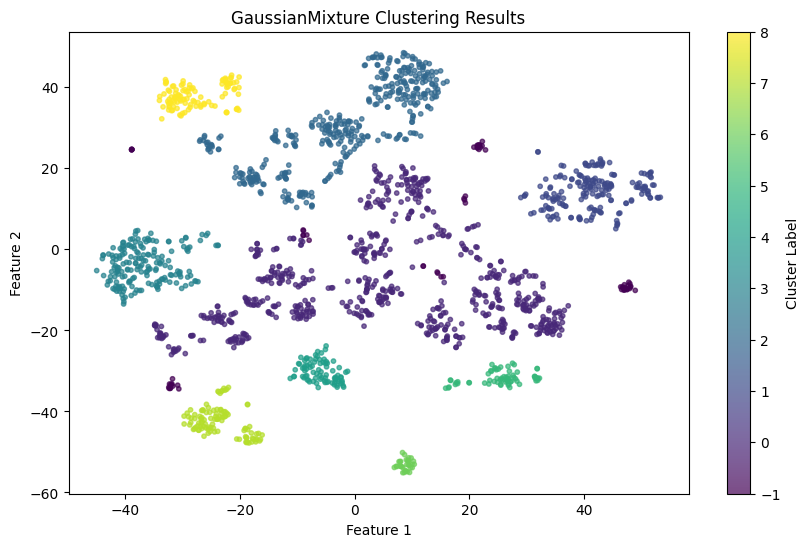

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)

gmm.fit(X_reduced)

# # Получаем метки кластеров
# labels = gmm.labels_

# Визуализируем результат кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.title('GaussianMixture Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# рабочие моменты

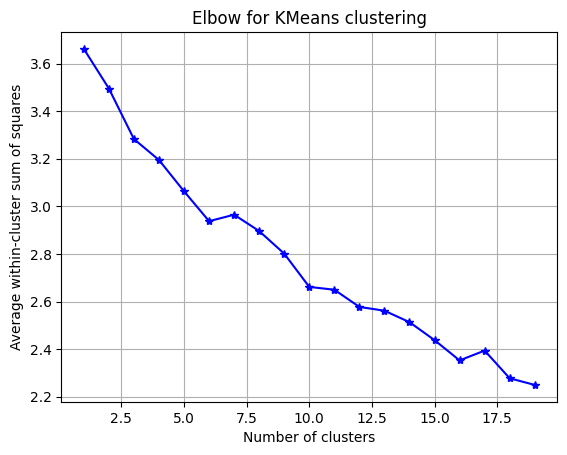

In [ ]:
cdata = cluster_scaled_df
K = range(1, 20)
KM = (sk_cluster.KMeans(n_clusters=k).fit(cdata) for k in K)
centroids = (k.cluster_centers_ for k in KM)

D_k = (sci_distance.cdist(cdata, cent, 'euclidean') for cent in centroids)
dist = (np.min(D, axis=1) for D in D_k)
avgWithinSS = [sum(d) / cdata.shape[0] for d in dist]
plt.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

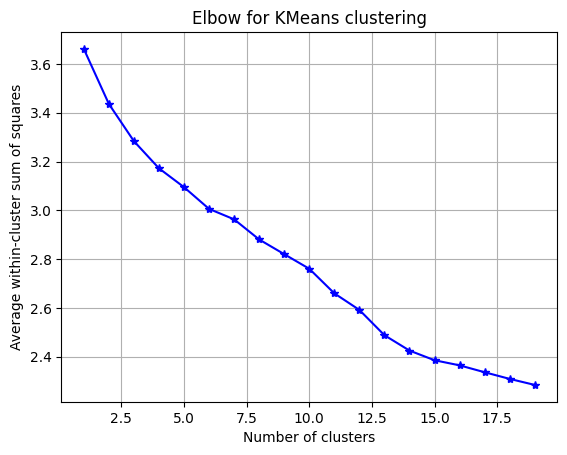

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance as sci_distance

# Пример: customer_data – это ваши данные
cdata = cluster_df_scaled

# Диапазон количества кластеров
K = range(1, 20)

# Список для хранения WCSS
avgWithinSS = []

# Для каждого числа кластеров
for k in K:
    # Выполнение KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cdata)

    # Центроиды
    centroids = kmeans.cluster_centers_

    # Расстояния от каждого объекта до ближайшего центра
    D_k = sci_distance.cdist(cdata, centroids, 'euclidean')
    dist = np.min(D_k, axis=1)

    # Средняя сумма квадратов расстояний для этого количества кластеров
    avgWithinSS.append(np.sum(dist) / cdata.shape[0])

# Визуализация "локтя"
plt.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()


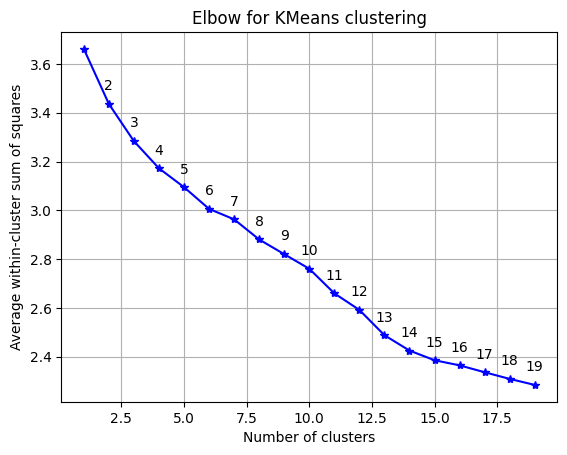

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance as sci_distance

# Пример: customer_data – это ваши данные
cdata = cluster_df_scaled

# Диапазон количества кластеров
K = range(1, 20)

# Список для хранения WCSS
avgWithinSS = []

# Для каждого числа кластеров
for k in K:
    # Выполнение KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cdata)

    # Центроиды
    centroids = kmeans.cluster_centers_

    # Расстояния от каждого объекта до ближайшего центра
    D_k = sci_distance.cdist(cdata, centroids, 'euclidean')
    dist = np.min(D_k, axis=1)

    # Средняя сумма квадратов расстояний для этого количества кластеров
    avgWithinSS.append(np.sum(dist) / cdata.shape[0])

# Визуализация "локтя"
plt.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

# Для лучшего визуального восприятия, добавляем аннотации
for i in range(1, len(K)):
    plt.annotate(f"{K[i]}", (K[i], avgWithinSS[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


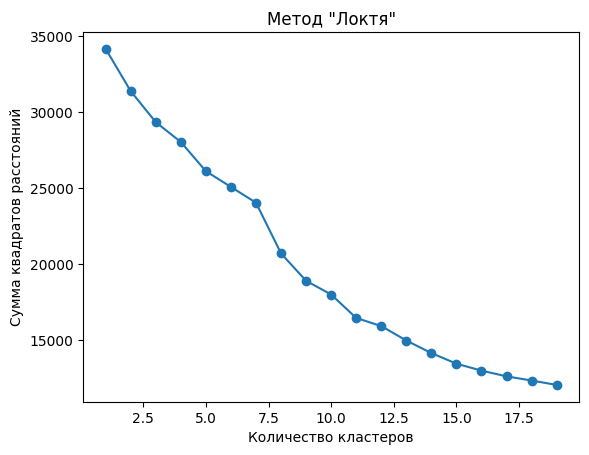

In [ ]:
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled_df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 20), sse, marker='o')
plt.title('Метод "Локтя"')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

In [ ]:
n_clusters = 5

means_cluster = sk_cluster.KMeans(n_clusters=n_clusters, random_state=111)
est = means_cluster.fit(cluster_scaled_df[features])
clusters = est.labels_
cluster_scaled_df['cluster'] = clusters

# Print some data about the clusters:

# For each cluster, count the members.
for c in range(n_clusters):
    cluster_members=cluster_scaled_df[cluster_scaled_df['cluster'] == c][:]
    print('Cluster{}(n={}):'.format(c, len(cluster_members)))
    print('-'* 17)
print(cluster_scaled_df.groupby(['cluster']).mean())

Cluster0(n=192):
-----------------
Cluster1(n=271):
-----------------
Cluster2(n=1223):
-----------------
Cluster3(n=206):
-----------------
Cluster4(n=5):
-----------------
              sex    online   offline   passport  mean_price     video  \
cluster                                                                  
0        0.048075 -0.128002 -0.138221   0.051407   -0.102340 -0.083068   
1        2.114555 -0.081218 -0.058912   0.051407    0.247005  0.453676   
2       -0.443673  0.032487  0.021091   0.051407   -0.076802 -0.083068   
3       -0.181771  0.032487  0.078122   0.051407    0.226637 -0.024225   
4       -0.443673  0.032487  0.123160 -19.452506   -0.009592 -0.083068   

         count_photo  dominant_topic_1  dominant_topic_2  dominant_topic_3  \
cluster                                                                      
0          -0.016067          2.896738         -0.736394         -0.458063   
1           0.213404         -0.321290          0.291466          0.05847

## уменьшение размерности

[0.12291609 0.0924084  0.07253732 0.0594271  0.05448549]


<ipython-input-116-c7d5bb81e3c9>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)


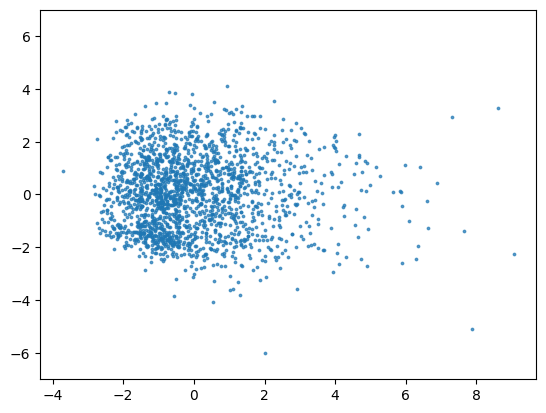

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5, svd_solver='auto')
X_reduced = pca.fit_transform(cluster_scaled_df)

print(pca.explained_variance_ratio_)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)
plt.ylim(-7, 7)
plt.show()

In [ ]:
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}')

Explained variance ratio: [0.12291609 0.0924084  0.07253732 0.0594271  0.05448549]
Cumulative explained variance: [0.12291609 0.21532449 0.28786181 0.34728892 0.40177441]


In [ ]:
components = pca.components_
components

array([[ 0.07850207, -0.01565291,  0.1046002 ,  0.03204635,  0.28963058,
         0.09101164,  0.19261147,  0.021403  , -0.04350507,  0.0817384 ,
         0.06676117,  0.35234048,  0.18470851,  0.33920326,  0.27954896,
         0.02799509,  0.22922733,  0.18327343,  0.04873285,  0.28428311,
         0.42348048,  0.37142162],
       [-0.04925028,  0.05454337,  0.04965986, -0.00705602,  0.05200725,
        -0.07338559, -0.12803404,  0.10180658, -0.52308247,  0.42349666,
         0.52867496, -0.0233617 , -0.36442271, -0.05482319, -0.13122302,
        -0.11919998,  0.11151836,  0.1997386 ,  0.05826801, -0.03155339,
         0.00983533, -0.01309208],
       [-0.14113668, -0.02862836, -0.10528802, -0.09704126,  0.02977254,
         0.01894924,  0.08534577,  0.24690617, -0.18497281,  0.0281881 ,
         0.12655508, -0.16288812,  0.11499776,  0.51036596,  0.56300568,
         0.01744338, -0.21141713, -0.15732206,  0.01877719, -0.15828097,
        -0.27846207, -0.21985549],
       [ 0.23142033

In [ ]:
hhhhh = pd.DataFrame(components, columns=features)

In [ ]:
hhhhh

,sex,online,offline,passport,mean_price,video,count_photo,dominant_topic_1,dominant_topic_2,dominant_topic_3,...,len_presentation,count_edu,docs,adult,family,child_teen,neuropsy,rating,count_reviews,very_positive
0,0.078502,-0.015653,0.104600,0.032046,0.289631,0.091012,0.192611,0.021403,-0.043505,0.081738,...,0.184709,0.339203,0.279549,0.027995,0.229227,0.183273,0.048733,0.284283,0.423480,0.371422
1,-0.049250,0.054543,0.049660,-0.007056,0.052007,-0.073386,-0.128034,0.101807,-0.523082,0.423497,...,-0.364423,-0.054823,-0.131223,-0.119200,0.111518,0.199739,0.058268,-0.031553,0.009835,-0.013092
2,-0.141137,-0.028628,-0.105288,-0.097041,0.029773,0.018949,0.085346,0.246906,-0.184973,0.028188,...,0.114998,0.510366,0.563006,0.017443,-0.211417,-0.157322,0.018777,-0.158281,-0.278462,-0.219855
3,0.231420,-0.042759,-0.217155,0.085440,-0.159809,-0.034056,-0.115768,0.538092,-0.182958,-0.255065,...,-0.107055,-0.099941,-0.077211,0.204384,-0.290958,-0.366523,-0.084090,0.129238,0.170864,0.270030
4,-0.364519,-0.131077,-0.275252,-0.000993,-0.170175,-0.137852,-0.179538,0.186110,-0.045142,-0.291101,...,-0.054008,0.069812,0.038419,0.219354,0.424851,0.417639,-0.390023,0.049431,-0.043126,-0.010485


In [ ]:
cluster_scaled_df

,sex,online,offline,passport,mean_price,video,count_photo,dominant_topic_1,dominant_topic_2,dominant_topic_3,...,len_presentation,count_edu,docs,adult,family,child_teen,neuropsy,rating,count_reviews,very_positive
0,-0.443673,0.032487,-0.720288,0.051407,1.542975,-0.083068,-0.041795,-0.345216,-0.736394,-0.458063,...,0.707498,2.236864,-0.977146,0.137102,-0.491419,-0.355647,-0.100584,0.463162,4.446536,-0.560912
1,2.253914,0.032487,-0.720288,0.051407,-0.041488,-0.083068,-0.535788,-0.345216,-0.736394,-0.458063,...,0.025616,-1.203028,-0.977146,0.137102,-0.491419,-0.355647,-0.100584,0.488895,7.499229,1.782811
2,-0.443673,0.032487,-0.720288,0.051407,0.755635,-0.083068,0.205201,-0.345216,-0.736394,-0.458063,...,-0.004842,0.143017,-0.977146,0.137102,-0.491419,2.811779,-0.100584,0.401402,2.129761,-0.560912
3,-0.443673,0.032487,-0.720288,0.051407,0.455790,12.038400,2.181172,-0.345216,1.357968,-0.458063,...,-0.042179,-1.053467,-0.977146,0.137102,2.034925,-0.355647,-0.100584,0.514629,3.547082,1.782811
4,-0.443673,0.032487,-0.720288,0.051407,0.308511,-0.083068,1.687179,-0.345216,-0.736394,2.183107,...,-0.668056,-1.053467,-0.977146,0.137102,2.034925,-0.355647,-0.100584,0.370521,1.802687,-0.560912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,-0.443673,0.032487,1.388333,0.051407,-0.581838,-0.083068,0.699194,-0.345216,1.357968,-0.458063,...,-1.275265,-0.903907,-0.977146,0.137102,-0.491419,-0.355647,-0.100584,-2.048425,-0.568601,-0.560912
1893,-0.443673,0.032487,1.388333,0.051407,2.129292,-0.083068,-0.288792,-0.345216,-0.736394,-0.458063,...,-0.772205,-0.305665,0.061477,0.137102,-0.491419,-0.355647,-0.100584,-2.048425,-0.568601,-0.560912
1894,-0.443673,0.032487,-0.720288,0.051407,0.628320,-0.083068,-0.535788,-0.345216,1.357968,-0.458063,...,-0.647423,0.292577,-0.977146,0.137102,-0.491419,-0.355647,-0.100584,-2.048425,-0.568601,-0.560912
1895,-0.443673,0.032487,1.388333,0.051407,-0.694411,-0.083068,-0.535788,-0.345216,1.357968,-0.458063,...,-0.513797,0.292577,0.061477,0.137102,-0.491419,-0.355647,-0.100584,0.524922,-0.296039,-0.560912


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(
    # maximum distance between 2 points,
    # to consider them neighbors (the most important parameter in the algorithm)
    eps=2000,
    min_samples=5,     # number of examples to consider as basic
    metric='euclidean'  # point distance metric
)
db.fit(cluster_scaled_df)
# get markup for all examples
# all noise examples are labeled -1
labels = db.labels_

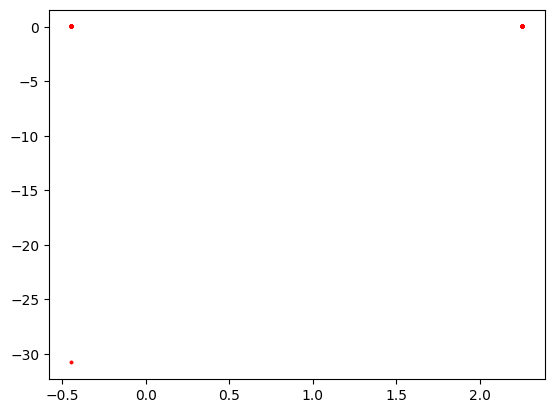

In [ ]:
plt.scatter(cluster_scaled_df.iloc[:,0], cluster_scaled_df.iloc[:, 1], c=labels, cmap='rainbow_r', s=3, alpha=0.7)
plt.show()

In [ ]:
import numpy as np
unique_labels = np.unique(labels)
print(f"Уникальные метки кластеров: {unique_labels}")
print(f"Количество шумовых точек (метка -1): {np.sum(labels == -1)}")

Уникальные метки кластеров: [-1  0  1  2  3]
Количество шумовых точек (метка -1): 21


In [ ]:
from sklearn.cluster import KMeans

# Применяем K-means с 5 кластерами (можно изменить количество кластеров)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(cluster_scaled_df)

# Получаем метки кластеров
labels = kmeans.labels_

# Визуализируем результат кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned.iloc[:, 0], df_cleaned.iloc[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

NameError: name 'scaled_df' is not defined

0.7980543971061707


<ipython-input-122-d1d365d68273>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)


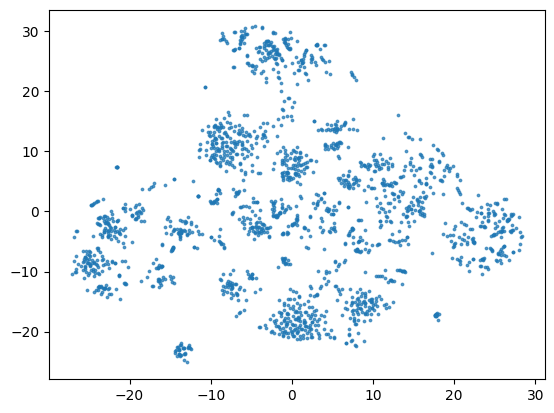

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2, # number of components
    init="pca",     # initial state for training the algorithm
    random_state=0, # pseudorandom number generator state
    perplexity=100., # number of neighbors. recommended from 5 to 50
)

X_reduced = tsne.fit_transform(cluster_scaled_df)
# Kulbak-Leibler distance, to estimate quality
print(tsne.kl_divergence_)

plt.scatter(X_reduced[:,0], X_reduced[:, 1], cmap='rainbow_r', s=3, alpha=0.7)
plt.show()

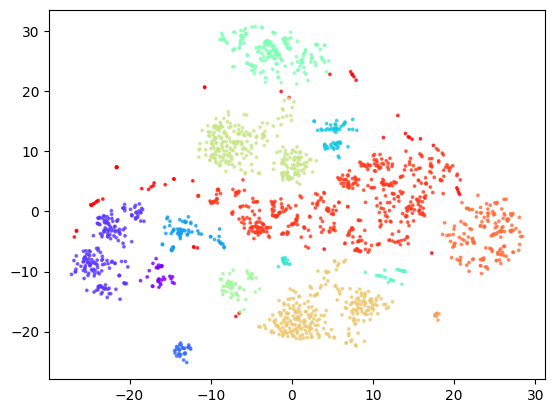

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(
    # maximum distance between 2 points,
    # to consider them neighbors (the most important parameter in the algorithm)
    eps=2,
    min_samples=10,     # number of examples to consider as basic
    metric='euclidean'  # point distance metric
)
db.fit(X_reduced)
# get markup for all examples
# all noise examples are labeled -1
labels = db.labels_

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='rainbow_r', s=3, alpha=0.7)
plt.show()

In [ ]:
cluster_df['cluster'] = labels  # Добавляем метки кластеров в DataFrame (labels из t-SNE или кластеризации)

for cluster_num in np.unique(labels):
    print(f"\nCluster {cluster_num} (n={np.sum(labels == cluster_num)}):")
    print('-' * 40)
    print(cluster_df[labels == cluster_num].describe())

<ipython-input-127-25c48992aa23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster'] = labels  # Добавляем метки кластеров в DataFrame (labels из t-SNE или кластеризации)



Cluster -1 (n=55):
----------------------------------------
             sex     online    offline   passport    mean_price      video  \
count  55.000000  55.000000  55.000000  55.000000     55.000000  55.000000   
mean    0.218182   0.963636   0.218182   0.909091   4342.535680   0.018182   
std     0.416818   0.188919   0.416818   0.290129   2427.431945   0.134840   
min     0.000000   0.000000   0.000000   0.000000    670.000000   0.000000   
25%     0.000000   1.000000   0.000000   1.000000   3008.064516   0.000000   
50%     0.000000   1.000000   0.000000   1.000000   3948.461538   0.000000   
75%     0.000000   1.000000   0.000000   1.000000   4879.629630   0.000000   
max     1.000000   1.000000   1.000000   1.000000  15262.500000   1.000000   

       count_photo     markup  count_edu       docs      adult     family  \
count    55.000000  55.000000  55.000000  55.000000  55.000000  55.000000   
mean      3.927273   0.142511  17.236364  13.890909   0.981818   0.418182   
std  

In [ ]:
import pandas as pd

# Данные из текста
data = {
    "Variable": [
        "Intercept", "sex", "online", "offline", "passport", "video", "count_photo",
        "dominant_topic_0", "dominant_topic_2", "dominant_topic_3", "markup",
        "answers", "len_presentation", "count_edu", "docs", "adult", "family",
        "child_teen", "neuropsy", "rating", "count_reviews", "very_positive"
    ],
    "coef": [
        0.0970, 0.0159, -0.3974, 0.5175, -0.0496, 0.0909, 0.1132,
        0.2079, 0.2526, 0.2899, 0.0340, -0.0671, 0.0645, 0.3334,
        -0.1224, 0.1673, 0.2811, -0.0176, 0.1007, -0.0464, 0.2710, 0.3242
    ],
    "std err": [
        1.340, 0.059, 52.099, 0.058, 0.059, 0.071, 0.061,
        0.099, 0.102, 0.087, 0.067, 0.075, 0.062, 0.089,
        0.083, 0.065, 0.064, 0.065, 0.072, 0.059, 0.101, 0.070
    ],
    "z": [
        0.072, 0.271, -0.008, 8.961, -0.839, 1.282, 1.857,
        2.109, 2.466, 3.343, 0.506, -0.900, 1.033, 3.761,
        -1.478, 2.573, 4.399, -0.272, 1.401, -0.782, 2.673, 4.653
    ],
    "P>|z|": [
        0.942, 0.786, 0.994, 0.000, 0.401, 0.200, 0.063,
        0.035, 0.014, 0.001, 0.613, 0.368, 0.302, 0.000,
        0.139, 0.010, 0.000, 0.785, 0.161, 0.434, 0.008, 0.000
    ],
    "[0.025": [
        -2.529, -0.099, -102.509, 0.404, -0.166, -0.048, -0.006,
        0.015, 0.052, 0.120, -0.098, -0.213, -0.058, 0.160,
        -0.285, 0.040, 0.156, -0.144, -0.040, -0.163, 0.072, 0.188
    ],
    "0.975]": [
        2.723, 0.131, 101.714, 0.631, 0.066, 0.230, 0.233,
        0.401, 0.453, 0.460, 0.166, 0.079, 0.187, 0.507,
        0.040, 0.295, 0.406, 0.109, 0.242, 0.070, 0.470, 0.461
    ]
}

# Создание DataFrame
df = pd.DataFrame(data)

In [ ]:
df

,Variable,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,0.0970,1.340,0.072,0.942,-2.529,2.723
1,sex,0.0159,0.059,0.271,0.786,-0.099,0.131
2,online,-0.3974,52.099,-0.008,0.994,-102.509,101.714
3,offline,0.5175,0.058,8.961,0.000,0.404,0.631
4,passport,-0.0496,0.059,-0.839,0.401,-0.166,0.066
5,video,0.0909,0.071,1.282,0.200,-0.048,0.230
6,count_photo,0.1132,0.061,1.857,0.063,-0.006,0.233
7,dominant_topic_0,0.2079,0.099,2.109,0.035,0.015,0.401
8,dominant_topic_2,0.2526,0.102,2.466,0.014,0.052,0.453
9,dominant_topic_3,0.2899,0.087,3.343,0.001,0.120,0.460


# описание данных

In [ ]:
model_df

,url_psy,name,rating,count_reviews,very_positive,passport,video,all_info,qualification,count_photo,...,adult,family,child_teen,neuropsy,mean_price,text_for_work,dominant_topic,markup,answers,len_presentation
0,ShiryaevaOV4,Ольга Вадимовна Ширяева,4.88,184,0,Паспорт проверен,0,Работает дистанционно\nО себе\nЗдравствуйте! М...,Может консультировать только взрослых,2,...,1,0,0,0,6375.000000,здравствовать звать ольга магистр психология к...,0,0.421293,77,2207
1,RybachenkoSS,Сергей Сергеевич Рыбаченко,4.93,296,1,Паспорт проверен,0,Работает дистанционно\nО себе\nВеду прием онла...,Может консультировать только взрослых,0,...,1,0,0,0,3560.000000,вести прием онлайн whatsapp zoom skype telegra...,0,-0.216349,1,1513
2,ChudopalovaEM,Елена Маликовна Чудопалова,4.76,99,0,Паспорт проверен,0,Работает дистанционно\nО себе\nПрактикующий пс...,"Может консультировать взрослых, детей и подрос...",3,...,1,0,1,0,4976.190476,практиковать психолог коуч являться эксперт ме...,0,-0.589658,13,1482
3,MotoraMN,Майя Николаевна Мотора,4.98,151,1,Паспорт проверен,1,Работает дистанционно\nСпециалист из Красноярс...,"Может консультировать взрослых, семьи и пары",11,...,1,1,0,0,4443.478261,психолог медицинский центр специалист семейный...,2,-0.321475,0,1444
4,MstislavskayaAA,Анна Алексеевна Мстиславская,4.70,87,0,Паспорт проверен,0,Работает дистанционно\nО себе\nЯ профессиональ...,"Может консультировать взрослых, семьи и пары",9,...,1,1,0,0,4181.818182,профессиональный психолог сексолог опыт работа...,3,0.633243,64,807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,ZaharovaOA,Оксана Александровна Дежкина,0.00,0,0,Паспорт проверен,0,Принимает у себя\nЗападный\nРаботает дистанцио...,Может консультировать только взрослых,5,...,1,0,0,0,2600.000000,20 год работать клиент кризисный жизненный сит...,2,0.544374,0,189
1892,VerchenovaYA,Екатерина Андреевна Верченова,0.00,0,0,Паспорт проверен,0,Принимает у себя\nУлица 1905 года\nРаботает ди...,Может консультировать только взрослых,1,...,1,0,0,0,7416.666667,практиковать психолог психотерапевт сексолог 1...,0,0.111664,0,701
1893,LebedevaYA56,Екатерина Андреевна Лебедева,0.00,0,0,Паспорт проверен,0,Работает дистанционно\nО себе\nЗдравствуйте! М...,Может консультировать только взрослых,0,...,1,0,0,0,4750.000000,здравствовать звать лебедев екатерина 39 год 7...,2,-1.317644,0,828
1894,LashmanovaEV,Евгения Валентиновна Асланова,5.00,10,0,Паспорт проверен,0,Принимает у себя\nВДНХ\nРаботает дистанционно\...,Может консультировать только взрослых,0,...,1,0,0,0,2400.000000,психоаналитическиориентированный психолог спец...,2,-0.844129,0,964


In [ ]:
features = ['sex', 'online', 'offline', 'passport', \
            'mean_price', \
            'video', 'count_photo', 'dominant_topic', 'markup', 'answers', 'len_presentation', \
            'count_edu', 'docs', 'adult', 'family', 'child_teen', 'neuropsy', \
            'rating', 'count_reviews', 'very_positive']

data = model_df[features]

In [ ]:
profile = ProfileReport(data, title="Pandas Profiling Report")

# Сохранение в HTML
profile.to_file("pandas_profiling_report.html")

/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 53.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import seaborn as sns
def my_info(var_name, var):
    plt.figure(figsize=(10, 5))
    sns.histplot(var, bins=int(180/5), color='#B38DF9', edgecolor='black')
    # plt.title(f'Распределение переменной {var_name}')
    # plt.xlabel(var_name)
    # plt.ylabel('Частота')
    # plt.show()

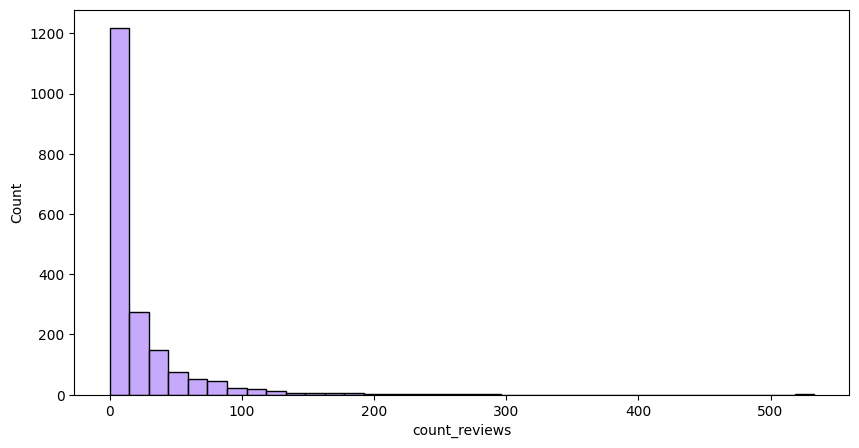

In [ ]:
my_info('j', model_df['count_reviews'])